In [1]:
import sys
sys.path.append('..')
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import projgrad
plt.style.use('../peptidome.mplstyle')

from lib import *

Pfam data for human:

https://pfam.xfam.org/proteome/9606

Sequence coverage 71% and residue coverage 45%

In [20]:
columnsstr = 'seq id> <alignment start> <alignment end> <envelope start> <envelope end> <hmm acc> <hmm name> <type> <hmm start> <hmm end> <hmm length> <bit score> <E-value> <clan'
columns = columnsstr.split('> <')
df_pfam = pd.read_csv(datadir+'9606_pfam.tsv.gz', sep='\t', skiprows=3, names=columns)

In [21]:
df = load_proteome_as_df('Human')
df = df[~(df['Gene']=='')]
seqids_set = set(df['Accession'])

In [22]:
# pfam contains info for complete proteome for 74k sequences for human
# filter on sequence ids found in reference proteome
df_pfam = df_pfam[df_pfam['seq id'].isin(seqids_set)]

In [23]:
len(set(df['Accession'])-set(df_pfam['seq id'])), len(set(df['Accession'])), len(set(df_pfam['seq id']))

(1737, 20480, 18743)

In [6]:
pfam_multiplicities = df_pfam['hmm acc'].value_counts()
#pfams_ordered = pfams_ordered.reset_index()
pfam_multiplicities.head()

PF00096    5390
PF00400     751
PF00028     693
PF00041     612
PF07679     566
Name: hmm acc, dtype: int64

In [7]:
pfam_multiplicities = df_pfam['hmm name'].value_counts()
#pfams_ordered = pfams_ordered.reset_index()
pfam_multiplicities.head()

zf-C2H2     5390
WD40         751
Cadherin     693
fn3          612
I-set        566
Name: hmm name, dtype: int64

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


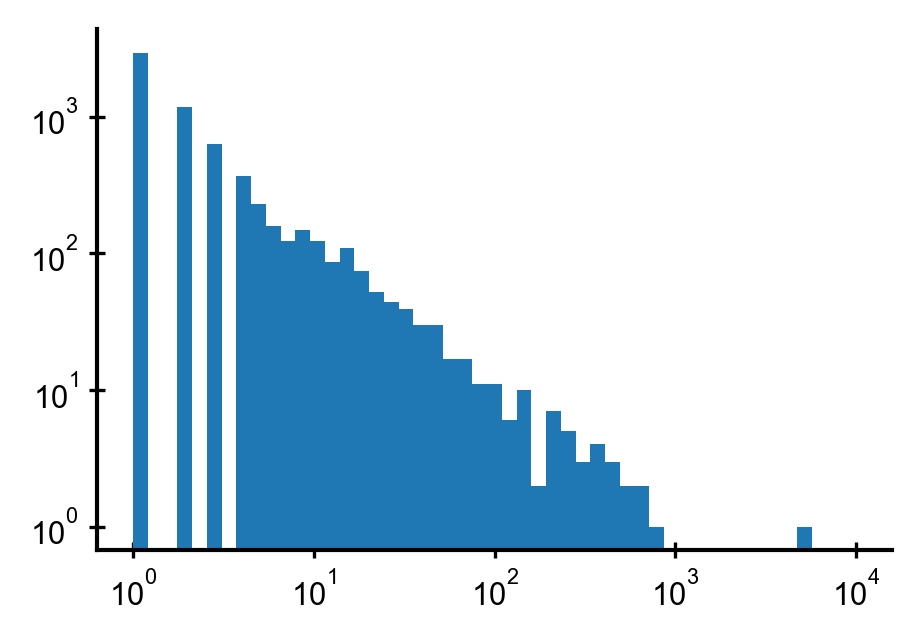

In [8]:
plt.hist(pfam_multiplicities, bins=np.logspace(0, 4))
plt.xscale('log')
plt.yscale('log')

## Zincfingers

In [57]:
zfs = df_pfam[df_pfam['hmm acc'] == 'PF00096']
zfs.head()

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
4169,A0A087X1K6,195,219,195,219,PF00096,zf-C2H2,PfamLive::Result::SequenceOntology=HASH(0x89b8...,1,23,23,24.0,0.093,CL0361
4170,A0A087X1K6,225,247,225,247,PF00096,zf-C2H2,PfamLive::Result::SequenceOntology=HASH(0x89b8...,1,23,23,23.6,0.120,CL0361
4171,A0A087X1K6,165,189,165,189,PF00096,zf-C2H2,PfamLive::Result::SequenceOntology=HASH(0x89b8...,1,23,23,18.3,5.800,CL0361
6983,A0A0A6YYC7,372,394,372,394,PF00096,zf-C2H2,PfamLive::Result::SequenceOntology=HASH(0x89b8...,1,23,23,19.9,1.800,CL0361
6984,A0A0A6YYC7,401,422,400,422,PF00096,zf-C2H2,PfamLive::Result::SequenceOntology=HASH(0x89b8...,2,23,23,19.7,2.100,CL0361


In [58]:
dfind = df.set_index('Accession')
seq_zf = [dfind.loc[row['seq id']]['Sequence'][row['envelope start']:row['envelope end']] for ind, row in zfs.iterrows()]
seq_zf[:5]

['ACSWQDCNKKFARSDELARHYRTH',
 'SCPICEKRFMRSDHLTKHARRH',
 'KCHYAGCEKVYGKSSHLKAHLRTH',
 'ICEYCARAFKSSHNLAVHRMIH',
 'QCEICGFTCRQKASLNWHMKKH']

In [59]:
df_nozf = df[~df['Accession'].isin(set(zfs['seq id']))]
df_nozf.to_csv('data/human_nozf.csv', index=False)

In [60]:
seqid = "A8MTY0"
zfs_seq = zfs[zfs['seq id']==seqid]
zfs_seq.sort_values('envelope start').head()

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
16596,A8MTY0,170,192,170,192,PF00096,zf-C2H2,PfamLive::Result::SequenceOntology=HASH(0x89b8...,1,23,23,20.8,0.940,CL0361
16597,A8MTY0,226,248,226,248,PF00096,zf-C2H2,PfamLive::Result::SequenceOntology=HASH(0x89b8...,1,23,23,20.6,1.100,CL0361
16588,A8MTY0,282,304,282,304,PF00096,zf-C2H2,PfamLive::Result::SequenceOntology=HASH(0x89b8...,1,23,23,25.2,0.037,CL0361
16587,A8MTY0,310,332,310,332,PF00096,zf-C2H2,PfamLive::Result::SequenceOntology=HASH(0x89b8...,1,23,23,26.4,0.016,CL0361
16591,A8MTY0,338,360,338,360,PF00096,zf-C2H2,PfamLive::Result::SequenceOntology=HASH(0x89b8...,1,23,23,23.5,0.130,CL0361


In [75]:
proteinatlas = pd.read_csv('../../data/proteinatlas.tsv.zip', sep='\t', index_col=0)
tissues = [c for c in proteinatlas.columns if 'Tissue' in c]
proteinatlas[tissues] = proteinatlas[tissues].div(proteinatlas[tissues].sum(axis=0), axis=1)
proteinatlas.fillna(0, inplace=True)
proteinatlas.head()

,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Evidence,HPA evidence,UniProt evidence,...,Brain RNA - amygdala [NX],Brain RNA - basal ganglia [NX],Brain RNA - cerebellum [NX],Brain RNA - cerebral cortex [NX],Brain RNA - hippocampal formation [NX],Brain RNA - hypothalamus [NX],Brain RNA - midbrain [NX],Brain RNA - olfactory region [NX],Brain RNA - pons and medulla [NX],Brain RNA - thalamus [NX]
Gene,,,,,,,,,,,,,,,,,,,,,
TSPAN6,"T245, TM4SF6, TSPAN-6",ENSG00000000003,Tetraspanin 6,O43657,X,100627109-100639991,"Predicted intracellular proteins, Predicted me...",Evidence at protein level,Evidence at transcript level,Evidence at protein level,...,7.0,6.6,2.9,4.9,7.4,7.3,6.9,4.1,34.2,6.6
TNMD,"BRICD4, ChM1L, myodulin, TEM, tendin",ENSG00000000005,Tenomodulin,Q9H2S6,X,100584802-100599885,Predicted membrane proteins,Evidence at protein level,Evidence at transcript level,Evidence at protein level,...,0.1,0.0,0.0,0.1,0.9,0.1,0.6,0.0,0.6,0.0
DPM1,"CDGIE, MPDS",ENSG00000000419,Dolichyl-phosphate mannosyltransferase subunit...,O60762,20,50934867-50958555,"Disease related genes, Enzymes, Plasma protein...",Evidence at protein level,Evidence at transcript level,Evidence at protein level,...,20.2,30.0,22.5,35.1,22.2,21.5,21.6,17.2,31.4,21.7
SCYL3,"PACE-1, PACE1",ENSG00000000457,SCY1 like pseudokinase 3,Q8IZE3,1,169849631-169894267,"Enzymes, Predicted intracellular proteins",Evidence at protein level,Evidence at transcript level,Evidence at protein level,...,8.5,10.6,10.5,11.9,7.3,6.5,9.3,7.8,9.5,8.9
C1orf112,FLJ10706,ENSG00000000460,Chromosome 1 open reading frame 112,Q9NSG2,1,169662007-169854080,Predicted intracellular proteins,Evidence at protein level,Evidence at transcript level,Evidence at protein level,...,3.3,4.9,8.4,3.6,2.7,2.4,5.0,1.5,4.5,5.9


/home/amayer/.conda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


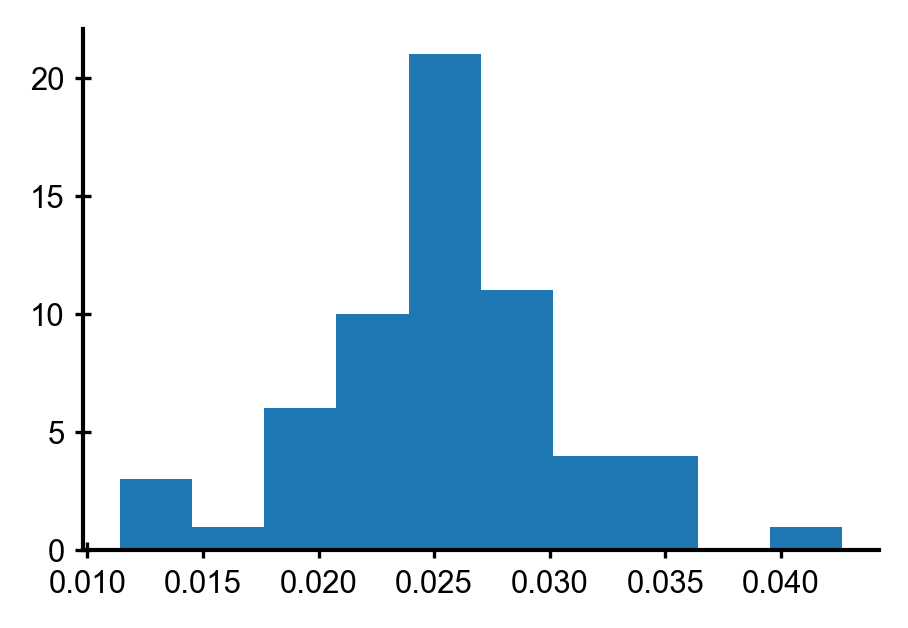

In [83]:
excluded_genes = set(df[df['Accession'].isin(set(zfs['seq id']))]['Gene'])
plt.hist(proteinatlas.loc[excluded_genes].filter(regex='Tissue').sum());

In [108]:
multiple_domains_hmm = set(pfam_multiplicities[pfam_multiplicities > 10].index)

In [109]:
df_multiple = df_pfam[df_pfam['hmm acc'].isin(multiple_domains_hmm)]
df_multiple.head()

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
16,A0A024R161,49,115,49,120,PF00226,DnaJ,PfamLive::Result::SequenceOntology=HASH(0x89d6...,1,57,63,56.3,6.600000e-12,CL0392
17,A0A024R161,108,152,96,153,PF00631,G-gamma,PfamLive::Result::SequenceOntology=HASH(0x8ba7...,20,67,68,39.3,1.200000e-06,No_clan
175,A0A075B6H5,39,128,39,130,PF07686,V-set,PfamLive::Result::SequenceOntology=HASH(0xf3db...,1,91,109,40.8,5.100000e-07,CL0011
176,A0A075B6H7,26,110,26,115,PF07686,V-set,PfamLive::Result::SequenceOntology=HASH(0xf3db...,1,91,109,63.3,5.300000e-14,CL0011
177,A0A075B6H8,28,111,28,117,PF07686,V-set,PfamLive::Result::SequenceOntology=HASH(0xf3db...,1,91,109,42.3,1.700000e-07,CL0011


In [110]:
multiple_domains_seqid = set(df_multiple['seq id'])

In [111]:
len(seqids_set-multiple_domains_seqid), len(seqids_set), len(multiple_domains_seqid)

(9115, 21080, 11965)

In [175]:
seqs = []
with open('data/human_replaced.csv', 'w') as f:
    f.write('Accession' + ',' + 'Sequence'+ '\n')
    for ind, row in df.iterrows():
        seqid, seq = row['Accession'], row['Sequence']
        pfam = df_multiple[df_multiple['seq id']==seqid]
        if pfam.shape[0] == 0:
            newseq = seq
        else:
            newseq = ''
            start = 0
            pfam = pfam.sort_values('envelope start')
            for ind, row in pfam.iterrows():
                end = row['envelope start']
                newseq += seq[start:end]
                newseq += 'X'*(row['envelope end']-row['envelope start'])
                start = row['envelope end']
            end = row['envelope end']
            newseq += seq[end:]
        seqs.append(newseq)
        f.write(seqid + ',' + newseq + '\n')

In [29]:
pfam_nproteins = df_pfam.groupby(['seq id', 'hmm name']).mean().reset_index()['hmm name'].value_counts()
pfam_nproteins.head(n=20)

zf-C2H2        681
7tm_4          424
V-set          421
KRAB           368
Pkinase        347
7tm_1          287
WD40           219
Homeodomain    219
RRM_1          207
Ank_2          199
PH             180
LRR_8          171
fn3            136
Ras            136
I-set          133
Ig_3           132
Pkinase_Tyr    129
BTB            129
C2             123
Trypsin        121
Name: hmm name, dtype: int64

In [30]:
pfam_nproteins = df_pfam.groupby(['seq id', 'hmm acc']).mean().reset_index()['hmm acc'].value_counts()
pfam_nproteins.head(n=20)

PF00096    681
PF13853    424
PF07686    421
PF01352    368
PF00069    347
PF00001    287
PF00400    219
PF00046    219
PF00076    207
PF12796    199
PF00169    180
PF13855    171
PF00041    136
PF00071    136
PF07679    133
PF13927    132
PF00651    129
PF07714    129
PF00168    123
PF00089    121
Name: hmm acc, dtype: int64

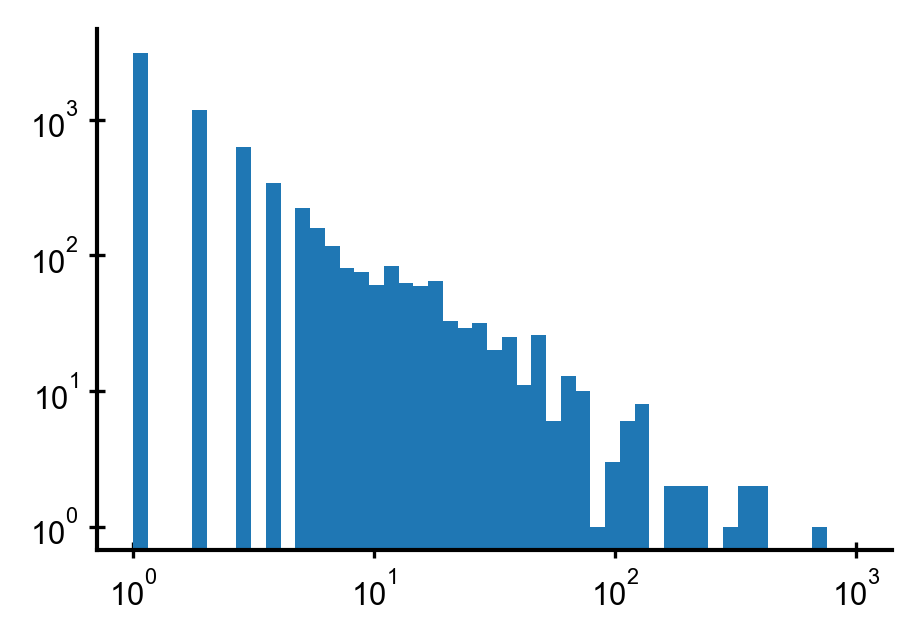

In [31]:
plt.hist(pfam_nproteins, bins=np.logspace(0, 3))
plt.xscale('log')
plt.yscale('log')

In [37]:
ntop = 10
top = set(df_pfam[df_pfam['hmm acc'].isin(set(pfam_nproteins.iloc[:ntop].index))]['seq id'])
df_notop = df[~df['Accession'].isin(top)]
df_notop.to_csv('data/human_notop%i.csv'%ntop, index=False)
len(top), sum(pfam_nproteins.iloc[:ntop]), '%e, %e' %(np.sum(df[~df['Accession'].isin(top)]['Sequence'].apply(len)), np.sum(df['Sequence'].apply(len)))

(3018, 3372, '9.766670e+06, 1.137888e+07')

/home/amayer/.conda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


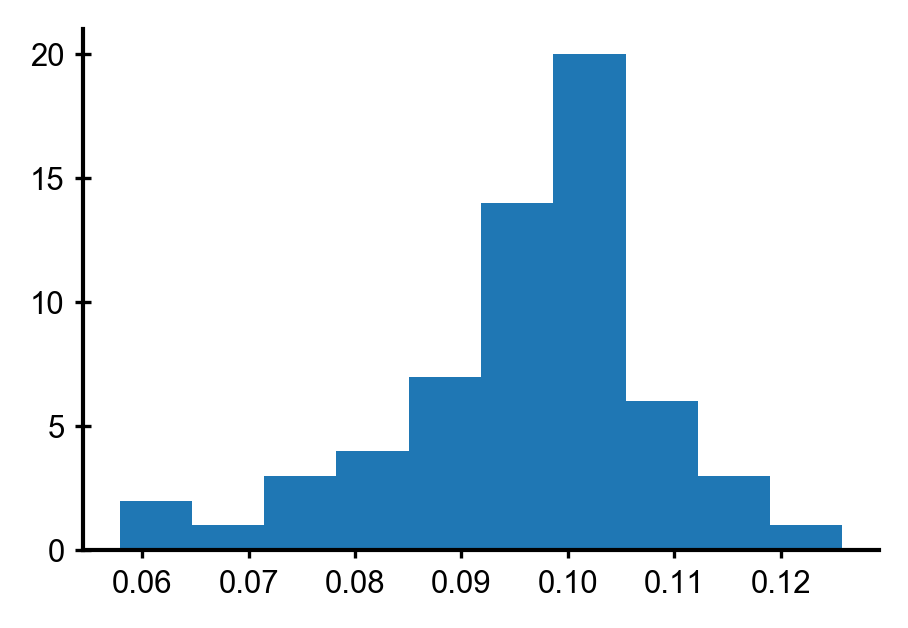

In [84]:
excluded_genes = set(df[df['Accession'].isin(top)]['Gene'])
plt.hist(proteinatlas.loc[excluded_genes].filter(regex='Tissue').sum());

In [38]:
# keep one random protein per family
remove = set()
#for pfam in pfam_nproteins.iloc[:ntop].index:
for pfam in pfam_nproteins[pfam_nproteins > 10].index:
    family = set(df_pfam[df_pfam['hmm acc'] == pfam]['seq id'].unique())
    family = family - set(random.sample(family, 10))
    remove = remove | family
len(remove)

8786

In [39]:
'%e, %e' %(np.sum(df[~df['Accession'].isin(remove)]['Sequence'].apply(len)), np.sum(df['Sequence'].apply(len)))

'5.574679e+06, 1.137888e+07'

In [41]:
df_domains = df[~df['Accession'].isin(remove)]
df_domains.to_csv('data/human_downsampled.csv', index=False)

## Olfactory receptors

In [42]:
olfactory_receptors = df_pfam[df_pfam['hmm acc'] == 'PF13853']
olfactory_receptors.shape[0]

424

In [43]:
seqs = [dfind.loc[row['seq id']]['Sequence'][row['envelope start']:row['envelope end']]
        for ind, row in olfactory_receptors.iterrows()]